Imports

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statannotations.Annotator import Annotator

ModuleNotFoundError: No module named 'statannotations'

Data loading

In [2]:
df = pd.read_csv('WB_data_for_plotting.csv')

Plotting

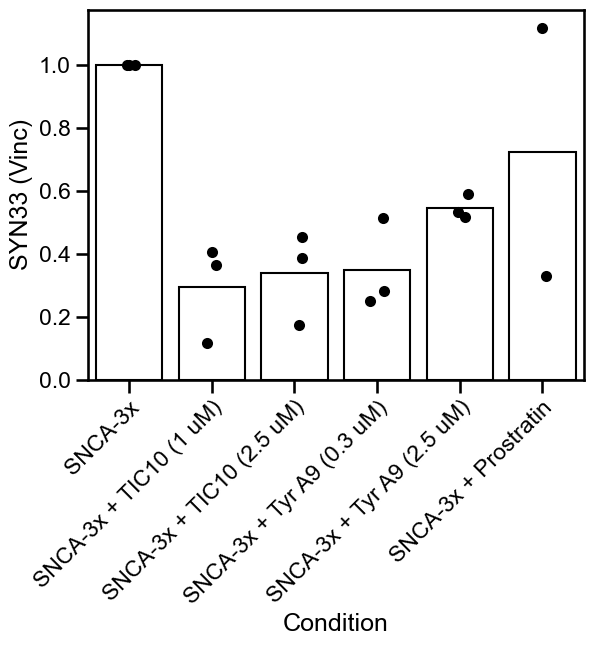

In [22]:
data = df
x = 'Condition'
y = 'SYN33 (Vinc)' 


# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Plot data points
ax = sns.stripplot(data=data, x=x, y=y, s=8, color='black')

# Overlay bar graph
ax = sns.barplot(data=data, x=x, y=y, errorbar=None, color='white', edgecolor="0")

# Rotate x-axis labels and align them with ticks
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Add statistical annotation on top of figure
stat_pairs=[('SNCA-3x', 'SNCA-3x + TIC10 (1 uM)'), 
            ('SNCA-3x', 'SNCA-3x + TIC10 (2.5 uM)'),
            ('SNCA-3x', 'SNCA-3x + Tyr A9 (0.3 uM)'),
            ('SNCA-3x', 'SNCA-3x + Tyr A9 (2.5 uM)'),
            ('SNCA-3x', 'SNCA-3x + Prostratin'),
            ]

annot = Annotator(ax, stat_pairs, data=data, x=x, y=y)
annot.configure(test='t-test_welch', verbose=2, loc='outside') # t-test_welch
annot.apply_test()
annot.annotate()

# Save plot as PDF
plt.savefig('WB' + '.pdf', bbox_inches='tight')

# Show the plot
plt.show()